In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Carga de conjuntos de datos
creditRisk = pd.read_csv("data_BOC_creditRisk.csv")
fraudDetection = pd.read_csv("data_BOC_fraudDetection.csv")
transactions = pd.read_csv("data_BOC_transactions.csv")

# creditRisk

In [3]:
# cabecera
creditRisk.head()

,Job,Housing,Credit amount,Duration,Purpose,Risk,CustomerID
0,2,own,1169,6,radio/TV,good,C1938652
1,2,own,5951,48,radio/TV,bad,C8016323
2,1,own,2096,12,education,good,C5141487
3,2,free,7882,42,furniture/equipment,good,C7035854
4,2,free,4870,24,car,bad,C5442952


In [4]:
num_filas = creditRisk.shape[0]
num_columnas = creditRisk.shape[1]

print("Número de filas:", num_filas)
print("Número de columnas:", num_columnas)

Número de filas: 1000
Número de columnas: 7


In [5]:
# información general
creditRisk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Job            1000 non-null   int64 
 1   Housing        1000 non-null   object
 2   Credit amount  1000 non-null   int64 
 3   Duration       1000 non-null   int64 
 4   Purpose        1000 non-null   object
 5   Risk           1000 non-null   object
 6   CustomerID     1000 non-null   object
dtypes: int64(3), object(4)
memory usage: 54.8+ KB


In [6]:
# Estadísticas descriptivas
creditRisk.describe()

,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000
mean,1.904000,3271.258000,20.903000
std,0.653614,2822.736876,12.058814
min,0.000000,250.000000,4.000000
25%,2.000000,1365.500000,12.000000
50%,2.000000,2319.500000,18.000000
75%,2.000000,3972.250000,24.000000
max,3.000000,18424.000000,72.000000


In [7]:
# Variables categóricas
print(creditRisk['Job'].value_counts())

2    630
1    200
3    148
0     22
Name: Job, dtype: int64


In [8]:
print(creditRisk['Housing'].value_counts())

own     713
rent    179
free    108
Name: Housing, dtype: int64


In [9]:
print(creditRisk['Purpose'].value_counts())

car                    337
radio/TV               280
furniture/equipment    181
business                97
education               59
repairs                 22
domestic appliances     12
vacation/others         12
Name: Purpose, dtype: int64


In [10]:
print(creditRisk['Risk'].value_counts())

good    700
bad     300
Name: Risk, dtype: int64


In [11]:
# Valores faltantes
creditRisk.isnull().sum()

Job              0
Housing          0
Credit amount    0
Duration         0
Purpose          0
Risk             0
CustomerID       0
dtype: int64

<ipython-input-12-1722a03bd47c>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matriz_correlacion = creditRisk.corr()


<Axes: >

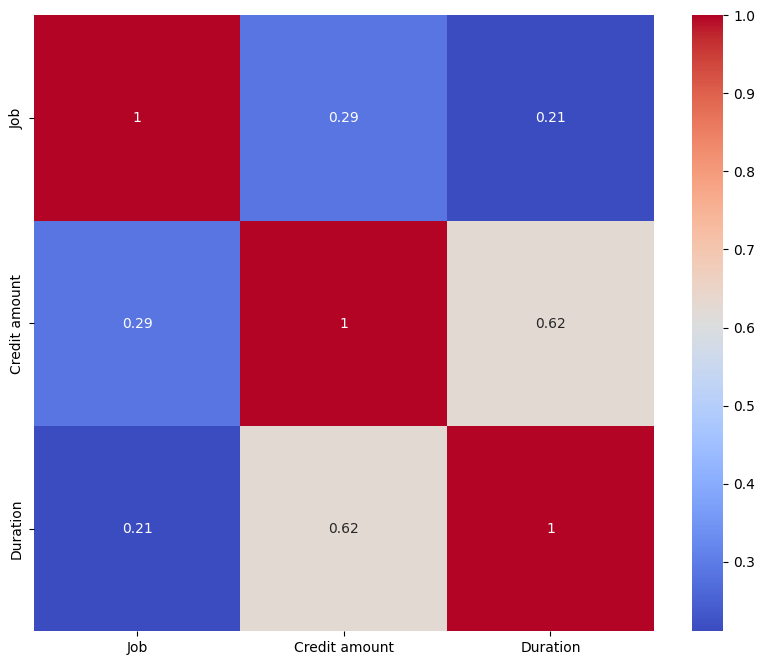

In [12]:
# correlación de variables númericas
matriz_correlacion = creditRisk.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm')

# fraudDetection

In [13]:
# cabecera
fraudDetection.head()

,type,amount,Orig,oldbalanceOrig,newbalanceOrig,Dest,oldbalanceDest,newbalanceDest,isFraud
0,PAYMENT,9839.64,C4241584,170136.0,160296.36,C7814776,0.0,0.0,0
1,PAYMENT,1864.28,C7332525,21249.0,19384.72,C7821866,0.0,0.0,0
2,TRANSFER,181.00,NaN,181.0,0.00,C5821867,0.0,0.0,1
3,CASH_OUT,181.00,C8442079,181.0,0.00,C8831669,21182.0,0.0,1
4,PAYMENT,11668.14,C3359562,41554.0,29885.86,NaN,0.0,0.0,0


In [14]:
num_filas = fraudDetection.shape[0]
num_columnas = fraudDetection.shape[1]

print("Número de filas:", num_filas)
print("Número de columnas:", num_columnas)

Número de filas: 100000
Número de columnas: 9


In [15]:
# información general
fraudDetection.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   type            100000 non-null  object 
 1   amount          100000 non-null  float64
 2   Orig            75000 non-null   object 
 3   oldbalanceOrig  100000 non-null  float64
 4   newbalanceOrig  100000 non-null  float64
 5   Dest            75000 non-null   object 
 6   oldbalanceDest  100000 non-null  float64
 7   newbalanceDest  100000 non-null  float64
 8   isFraud         100000 non-null  int64  
dtypes: float64(5), int64(1), object(3)
memory usage: 6.9+ MB


In [16]:
# Estadísticas descriptivas
fraudDetection.describe()

,amount,oldbalanceOrig,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
count,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,100000.000000
mean,1.736022e+05,8.777575e+05,8.940619e+05,8.805048e+05,1.184041e+06,0.001160
std,3.443003e+05,2.673284e+06,2.711318e+06,2.402267e+06,2.802350e+06,0.034039
min,3.200000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,9.963562e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
50%,5.274552e+04,2.006150e+04,0.000000e+00,2.083943e+04,4.990918e+04,0.000000
75%,2.117631e+05,1.901920e+05,2.148132e+05,5.882724e+05,1.058186e+06,0.000000
max,1.000000e+07,3.379739e+07,3.400874e+07,3.400874e+07,3.894623e+07,1.000000


In [17]:
# Variables categóricas
print(fraudDetection['type'].value_counts())

PAYMENT     39512
CASH_OUT    30718
CASH_IN     20185
TRANSFER     8597
DEBIT         988
Name: type, dtype: int64


In [18]:
print(fraudDetection['isFraud'].value_counts())

0    99884
1      116
Name: isFraud, dtype: int64


In [19]:
print(fraudDetection[['type','isFraud']].value_counts())

type      isFraud
PAYMENT   0          39512
CASH_OUT  0          30659
CASH_IN   0          20185
TRANSFER  0           8540
DEBIT     0            988
CASH_OUT  1             59
TRANSFER  1             57
dtype: int64


In [20]:
# Valores faltantes
fraudDetection.isnull().sum()

type                  0
amount                0
Orig              25000
oldbalanceOrig        0
newbalanceOrig        0
Dest              25000
oldbalanceDest        0
newbalanceDest        0
isFraud               0
dtype: int64

<ipython-input-21-1ad76186dfba>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matriz_correlacion = fraudDetection.corr()


<Axes: >

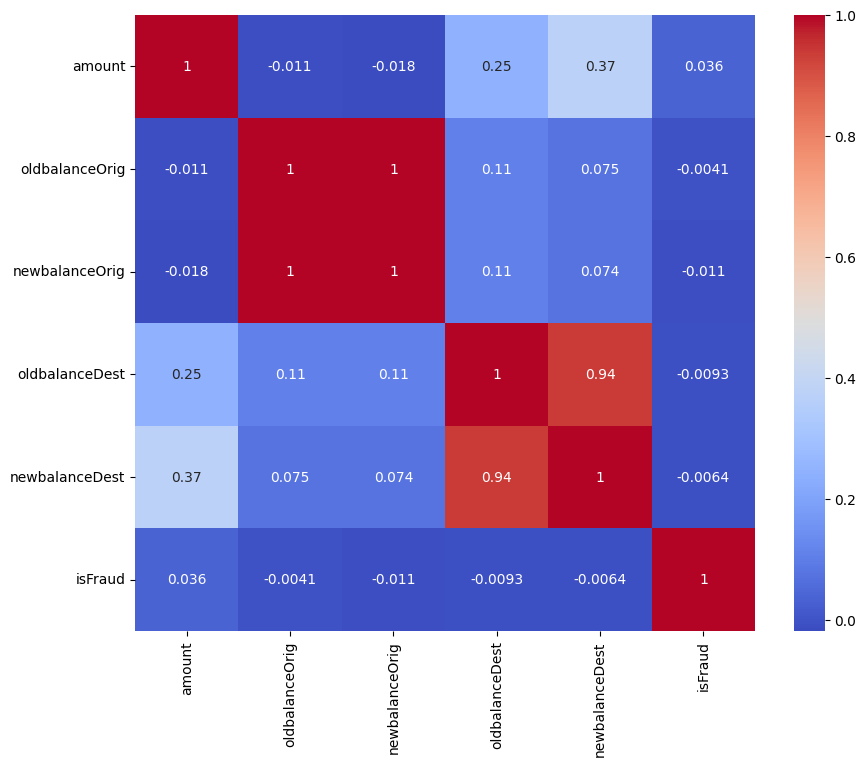

In [21]:
# correlación de variables númericas

matriz_correlacion = fraudDetection.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm')

Existe una correlación perfecta entre los balances de origen por un lado y los balances de destino por otro, estos resultados no son destacables ya que es algo lógico.

# transactions

In [22]:
# cabecera
transactions.head()

,TransactionID,CustomerID,CustomerBirth,CustomerGender,TransactionLocation,TransactionDate,TransactionAmount (eur),otherActor
0,T1,C5841053,10/1/94,F,Viana do Castelo,2/8/16,25.0,C1419665
1,T2,C2142763,4/4/57,M,Coria del Río,2/8/16,27999.0,NaN
2,T3,C4417068,26/11/96,F,Jávea,2/8/16,459.0,C3467392
3,T4,C5342380,14/9/73,F,Córdoba,2/8/16,2060.0,C6628470
4,T5,C9031234,24/3/88,F,Sestao,2/8/16,1762.5,C7321714


In [23]:
num_filas = transactions.shape[0]
num_columnas = transactions.shape[1]

print("Número de filas:", num_filas)
print("Número de columnas:", num_columnas)

Número de filas: 1048567
Número de columnas: 8


In [24]:
# información general
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048567 entries, 0 to 1048566
Data columns (total 8 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   TransactionID            1048567 non-null  object 
 1   CustomerID               1048567 non-null  object 
 2   CustomerBirth            1045170 non-null  object 
 3   CustomerGender           1047467 non-null  object 
 4   TransactionLocation      1048567 non-null  object 
 5   TransactionDate          1048567 non-null  object 
 6   TransactionAmount (eur)  1048567 non-null  float64
 7   otherActor               419567 non-null   object 
dtypes: float64(1), object(7)
memory usage: 64.0+ MB


In [25]:
# Estadísticas descriptivas
transactions.describe()

,TransactionAmount (eur)
count,1.048567e+06
mean,3.103965e+02
std,6.753476e+03
min,-1.560035e+06
25%,-2.700000e+02
50%,1.000000e+02
75%,6.000000e+02
max,6.000083e+05


In [26]:
# Variables categóricas
print(transactions['CustomerGender'].value_counts())

M    765530
F    281936
T         1
Name: CustomerGender, dtype: int64


In [27]:
print(transactions['TransactionLocation'].value_counts())

Éibar                 2959
Puerto del Rosario    2926
Sitges                2923
Alcalá de Guadaira    2915
Mataró                2911
                      ... 
Badajoz               2680
Benalmádena           2680
Sagunto               2673
Ripollet              2656
Burjasot              2636
Name: TransactionLocation, Length: 375, dtype: int64


In [28]:
# Valores faltantes
transactions.isnull().sum()

TransactionID                   0
CustomerID                      0
CustomerBirth                3397
CustomerGender               1100
TransactionLocation             0
TransactionDate                 0
TransactionAmount (eur)         0
otherActor                 629000
dtype: int64

# Combinación conjuntos de datos útiles para nuestro proyecto

In [29]:
creditRisk

,Job,Housing,Credit amount,Duration,Purpose,Risk,CustomerID
0,2,own,1169,6,radio/TV,good,C1938652
1,2,own,5951,48,radio/TV,bad,C8016323
2,1,own,2096,12,education,good,C5141487
3,2,free,7882,42,furniture/equipment,good,C7035854
4,2,free,4870,24,car,bad,C5442952
...,...,...,...,...,...,...,...
995,1,own,1736,12,furniture/equipment,good,C1739283
996,3,own,3857,30,car,good,C8727225
997,2,own,804,12,radio/TV,good,C1736476
998,2,free,1845,45,radio/TV,bad,C1416248


In [30]:
fraudDetection

,type,amount,Orig,oldbalanceOrig,newbalanceOrig,Dest,oldbalanceDest,newbalanceDest,isFraud
0,PAYMENT,9839.64,C4241584,170136.0,160296.36,C7814776,0.00,0.00,0
1,PAYMENT,1864.28,C7332525,21249.0,19384.72,C7821866,0.00,0.00,0
2,TRANSFER,181.00,NaN,181.0,0.00,C5821867,0.00,0.00,1
3,CASH_OUT,181.00,C8442079,181.0,0.00,C8831669,21182.00,0.00,1
4,PAYMENT,11668.14,C3359562,41554.0,29885.86,NaN,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...
99995,PAYMENT,4020.66,C1910079,159929.0,155908.34,C3553962,0.00,0.00,0
99996,PAYMENT,18345.49,C5730441,6206.0,0.00,NaN,0.00,0.00,0
99997,CASH_IN,183774.91,NaN,39173.0,222947.91,C3813089,54925.05,0.00,0
99998,CASH_OUT,82237.17,C7836334,6031.0,0.00,C4640222,592635.66,799140.46,0


In [31]:
transactions

,TransactionID,CustomerID,CustomerBirth,CustomerGender,TransactionLocation,TransactionDate,TransactionAmount (eur),otherActor
0,T1,C5841053,10/1/94,F,Viana do Castelo,2/8/16,25.0,C1419665
1,T2,C2142763,4/4/57,M,Coria del Río,2/8/16,27999.0,NaN
2,T3,C4417068,26/11/96,F,Jávea,2/8/16,459.0,C3467392
3,T4,C5342380,14/9/73,F,Córdoba,2/8/16,2060.0,C6628470
4,T5,C9031234,24/3/88,F,Sestao,2/8/16,1762.5,C7321714
...,...,...,...,...,...,...,...,...
1048562,T1048563,C8020229,8/4/90,M,Chambéry,18/9/16,799.0,C1229564
1048563,T1048564,C6459278,20/2/92,M,Bilbao,18/9/16,-460.0,NaN
1048564,T1048565,C6412354,18/5/89,M,Cáceres,18/9/16,-770.0,NaN
1048565,T1048566,C6420483,30/8/78,M,Le Mans,18/9/16,1000.0,C1439065


Dado que el conjunto de datos que contiene el riesgo crediticio no nos es util para nuestro proyecto, nos quedamos y combinamos unicamente los datasets para la detección de fraudes y las transacciones efectuadas.

In [32]:
fraudDetectionTransactions = pd.merge(transactions, fraudDetection, left_on='CustomerID', right_on='Orig', how='inner')
fraudDetectionTransactions = fraudDetectionTransactions.drop_duplicates()

In [33]:
fraudDetectionTransactions

,TransactionID,CustomerID,CustomerBirth,CustomerGender,TransactionLocation,TransactionDate,TransactionAmount (eur),otherActor,type,amount,Orig,oldbalanceOrig,newbalanceOrig,Dest,oldbalanceDest,newbalanceDest,isFraud
0,T4,C5342380,14/9/73,F,Córdoba,2/8/16,2060.00,C6628470,PAYMENT,6855.89,C5342380,108187.65,101331.76,C8430076,0.00,0.00,0
1,T391139,C5342380,29/5/79,M,Almazora,13/8/16,-878.40,NaN,PAYMENT,6855.89,C5342380,108187.65,101331.76,C8430076,0.00,0.00,0
2,T7,C7126560,26/1/92,F,Nancy,2/8/16,566.00,NaN,CASH_OUT,482670.57,C7126560,0.00,0.00,C5964744,761779.21,1614565.42,0
3,T835790,C7126560,21/2/88,M,Dijon,4/9/16,36.00,NaN,CASH_OUT,482670.57,C7126560,0.00,0.00,C5964744,761779.21,1614565.42,0
4,T894831,C7126560,24/1/93,M,Limoges,7/9/16,19.00,C3737567,CASH_OUT,482670.57,C7126560,0.00,0.00,C5964744,761779.21,1614565.42,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102030,T1048464,C5267968,31/3/85,F,Villeurbanne,18/9/16,-60.00,NaN,PAYMENT,11423.93,C5267968,130.00,0.00,C4013089,0.00,0.00,0
102031,T1048476,C4322319,3/9/92,F,Granadilla de Abona,18/9/16,250.00,C8022914,PAYMENT,620.08,C4322319,721895.93,721275.85,C6040830,0.00,0.00,0
102032,T1048483,C6810032,16/8/83,M,Majadahonda,18/9/16,742.02,NaN,PAYMENT,4940.20,C6810032,48005.00,43064.80,NaN,0.00,0.00,0
102033,T1048540,C7411577,14/10/89,F,Angers,18/9/16,695.00,C7340482,PAYMENT,13612.32,C7411577,0.00,0.00,C7096077,0.00,0.00,0


In [34]:
fraudDetectionTransactions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102035 entries, 0 to 102034
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   TransactionID            102035 non-null  object 
 1   CustomerID               102035 non-null  object 
 2   CustomerBirth            101707 non-null  object 
 3   CustomerGender           101923 non-null  object 
 4   TransactionLocation      102035 non-null  object 
 5   TransactionDate          102035 non-null  object 
 6   TransactionAmount (eur)  102035 non-null  float64
 7   otherActor               40921 non-null   object 
 8   type                     102035 non-null  object 
 9   amount                   102035 non-null  float64
 10  Orig                     102035 non-null  object 
 11  oldbalanceOrig           102035 non-null  float64
 12  newbalanceOrig           102035 non-null  float64
 13  Dest                     76456 non-null   object 
 14  oldb

In [35]:
fraudDetectionTransactions.isnull().sum()

TransactionID                  0
CustomerID                     0
CustomerBirth                328
CustomerGender               112
TransactionLocation            0
TransactionDate                0
TransactionAmount (eur)        0
otherActor                 61114
type                           0
amount                         0
Orig                           0
oldbalanceOrig                 0
newbalanceOrig                 0
Dest                       25579
oldbalanceDest                 0
newbalanceDest                 0
isFraud                        0
dtype: int64

In [36]:
fraudDetectionTransactions["isFraud"].value_counts()

0    101917
1       118
Name: isFraud, dtype: int64

Se observa una descompensación muy sifnificativa entre las clases de fraude y no fraude.

In [37]:
fraudDetectionTransactions["CustomerGender"].value_counts()

M    74390
F    27533
Name: CustomerGender, dtype: int64

Se observa una descompensación muy significativa entre hombres y mujeres, con lo que los conjuntos combinados contienen un sesgo de genero destacable.

In [38]:
fraudDetectionTransactions[["isFraud","CustomerGender"]].value_counts()

isFraud  CustomerGender
0        M                 74306
         F                 27499
1        M                    84
         F                    34
dtype: int64

Se observa que los hombres sufren exactamente el doble de fraudes que las mujeres, si bien, al ser una cantidad tan bajas de fraudes totales no podemos darlo como norma.

In [39]:
fraudDetectionTransactions[["isFraud","type"]].value_counts()

isFraud  type    
0        PAYMENT     40291
         CASH_OUT    31226
         CASH_IN     20662
         TRANSFER     8740
         DEBIT         998
1        CASH_OUT       63
         TRANSFER       55
dtype: int64

Aunque son pocos los fraudes el total de estos son llevados a cabo mediante transferencias y a la hora de retirar dinero.